In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from spyct import Model

In [3]:
# generate me random regression data
np.random.seed(0)
X = np.random.uniform(low=0.5, high=13.3, size=(100,2))
y = np.random.uniform(low=0.5, high=13.3, size=(100,1))

In [4]:
# create a model
model = Model(num_trees=1)
model.fit(X, y)

In [5]:
preds_spyct = model.predict(X)

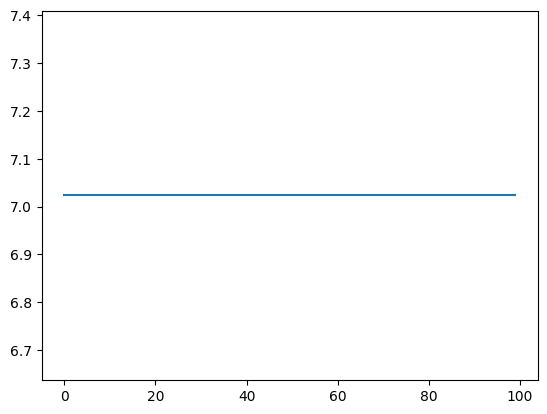

In [6]:
plt.plot(preds_spyct)

In [7]:
import sys
sys.path.append('..')
from src.models.model import Spyct

In [8]:
import torch
new_model = Spyct()
new_model.fit(torch.Tensor(X), torch.Tensor(y), enable_mc_dropout=False)

KeyboardInterrupt: 

In [ ]:
new_model_preds = new_model.predict(torch.Tensor(X))

torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Si

In [10]:
new_model_preds.shape

torch.Size([100, 1])

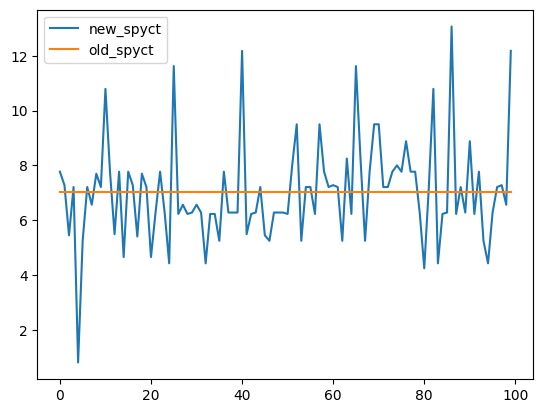

In [11]:
plt.plot(new_model_preds.detach().numpy(), label='new_spyct')
plt.plot(preds_spyct, label='old_spyct')
plt.legend()

In [9]:
from src.data.dataset import ReducedDataset
path = os.path.join(os.getcwd(), '../data/raw')
filename = 'BO_truncated_mso_2018.pcl'
data = ReducedDataset(path, filename)
X_train, X_test, y_train, y_test = data.get_tensors()

(199, 69) torch.Size([199, 362])


In [10]:
# create a model
spyct_model = Model(num_trees=1)
spyct_model.fit(X_train.numpy(), y_train.numpy())

In [11]:
import torch
new_model = Spyct()
new_model.fit(X_train, y_train, enable_mc_dropout=False)

In [12]:
new_model_preds = new_model.predict(X_test)
spyct_preds = spyct_model.predict(X_test.numpy())

torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Size([1])
torch.Si

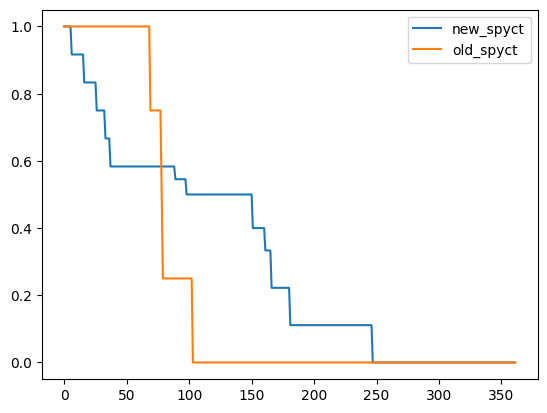

In [59]:
i=12
plt.plot(new_model_preds.detach().numpy()[i], label='new_spyct')
plt.plot(spyct_preds[i], label='old_spyct')
plt.legend()

In [60]:
y_test[12].sum().detach()

tensor(97.)

In [9]:
path = os.path.join(os.getcwd(), '../data/raw')
filename = 'tvmarketing.csv'
tv_data = pd.read_csv(os.path.join(path, filename))

In [10]:
tv_data

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [11]:
X = tv_data[['TV', 'Sales']].values
y = tv_data['Sales'].values

In [12]:
X.shape

(200, 2)

In [52]:
from src.models.model import VSpyct

bayes_spyct = VSpyct(bs=64, max_depth=6, epochs=200, lr=0.0001, minimum_examples_to_split=3)
bayes_spyct.fit(torch.Tensor(X), torch.Tensor(y))

Total variance: 27.22185707092285
Impurity(
  (linear): PyroLinear(in_features=2, out_features=1, bias=True)
)


Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epochs:   8%|▊         | 17/200 [00:00<00:08, 22.72it/s]


Early stopping at epoch 17.
Impurity(
  (linear): PyroLinear(in_features=2, out_features=1, bias=True)
)
Rows left:  torch.Size([188]) Var left tensor(28.7392)
Rows right:  torch.Size([12]) Var right tensor(1.3845)
Impurity(
  (linear): PyroLinear(in_features=2, out_features=1, bias=True)
)


Epochs:   0%|          | 0/200 [00:00<?, ?it/s]/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/pyro/infer/trace_elbo.py:158: UserWarning: Encountered NaN: loss
  warn_if_nan(loss, "loss")
/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/pyro/infer/trace_elbo.py:158: UserWarning: Encountered NaN: loss
  warn_if_nan(loss, "loss")
/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/pyro/infer/trace_elbo.py:158: UserWarning: Encountered NaN: loss
  warn_if_nan(loss, "loss")
/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/pyro/infer/trace_elbo.py:158: UserWarning: Encountered NaN: loss
  warn_if_nan(loss, "loss")
Epochs:   2%|▏         | 3/200 [00:00<00:02, 78.20it/s]


Early stopping at epoch 3.
Impurity(
  (linear): PyroLinear(in_features=2, out_features=1, bias=True)
)
Rows left:  torch.Size([0]) Var left tensor(0.)
Rows right:  torch.Size([0]) Var right tensor(0.)
Impurity(
  (linear): PyroLinear(in_features=2, out_features=1, bias=True)
)


Epochs:   2%|▏         | 4/200 [00:00<00:06, 28.01it/s]

Early stopping at epoch 4.
Impurity(
  (linear): PyroLinear(in_features=2, out_features=1, bias=True)
)


Rows left:  torch.Size([0]) Var left tensor(0.)
Rows right:  torch.Size([188]) Var right tensor(28.7392)


In [53]:
bayes_preds = bayes_spyct.predict(torch.Tensor(X))

In [54]:
bayes_preds[-1]

tensor([12.5500, 14.1165, 12.5500, 14.1165, 12.5500, 12.5500, 12.5500, 14.1165,
        12.5500, 14.1165])

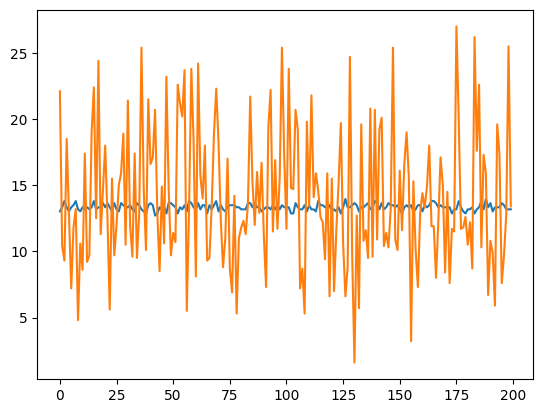

In [55]:
plt.plot(bayes_preds.mean(axis=1))
plt.plot(y)

In [30]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [28]:
bayes_preds.mean(axis=1)

tensor([13.6370, 12.7804,  6.7839, 14.4937, 14.4937,  5.9273, 13.6370, 14.4937,
         7.6405, 14.4937, 14.4937, 14.4937, 11.9237, 14.4937, 14.4937, 14.4937,
        14.4937, 14.4937, 14.4937, 14.4937, 14.4937, 14.4937, 11.0671, 14.4937,
        13.6370, 14.4937, 14.4937, 13.6370, 14.4937, 14.4937, 14.4937, 14.4937,
        14.4937, 14.4937, 14.4937, 14.4937, 14.4937, 14.4937, 13.6370, 14.4937,
        14.4937, 14.4937, 14.4937, 14.4937, 12.7804, 14.4937, 14.4937, 14.4937,
        14.4937, 14.4937, 14.4937, 12.7804, 14.4937, 13.6370, 14.4937, 14.4937,
         5.9273, 14.4937, 14.4937, 14.4937, 14.4937, 14.4937, 14.4937, 14.4937,
        14.4937, 14.4937, 14.4937, 14.4937, 14.4937, 14.4937, 14.4937, 14.4937,
        14.4937, 14.4937, 14.4937,  6.7839, 13.6370, 14.4937,  5.9273, 14.4937,
        14.4937, 14.4937, 14.4937, 14.4937, 14.4937, 14.4937, 14.4937, 14.4937,
        14.4937, 13.6370, 14.4937, 12.7804, 14.4937, 14.4937, 14.4937, 14.4937,
        14.4937, 14.4937, 14.4937, 14.49

In [40]:
spyct = Spyct()
spyct.fit(torch.Tensor(X), torch.Tensor(y))
spyct_preds = spyct.predict(X)

KeyboardInterrupt: 

In [ ]:
spyct_preds

array([[22.143011 ],
       [10.350531 ],
       [ 9.232467 ],
       [18.408731 ],
       [12.880948 ],
       [ 7.0873203],
       [11.803922 ],
       [13.2022915],
       [ 5.085515 ],
       [10.675502 ],
       [ 8.695408 ],
       [17.379194 ],
       [ 9.218473 ],
       [ 9.711523 ],
       [18.9526   ],
       [22.454346 ],
       [12.515241 ],
       [24.364592 ],
       [11.351603 ],
       [14.596709 ],
       [18.002018 ],
       [12.530278 ],
       [ 5.640751 ],
       [15.556227 ],
       [ 9.695667 ],
       [12.124991 ],
       [15.0087595],
       [15.856189 ],
       [18.926283 ],
       [10.488525 ],
       [21.41832  ],
       [11.923518 ],
       [ 9.613901 ],
       [17.410254 ],
       [ 9.516137 ],
       [12.887456 ],
       [25.289606 ],
       [14.6087675],
       [10.084673 ],
       [21.51435  ],
       [16.609303 ],
       [17.091175 ],
       [20.701855 ],
       [12.852948 ],
       [ 8.506595 ],
       [14.909096 ],
       [10.596881 ],
       [23.18